In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Womens Clothing E-Commerce Reviews.csv')

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.drop(['Unnamed: 0', 'Clothing ID'], axis=1, inplace=True)

In [ ]:
df.head()

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head()

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [ ]:
df = df[['Review Text','Rating']]

In [ ]:
df['sentiment'] = df['Rating'].apply(lambda x: 1 if x >= 3 else 0)

<ipython-input-29-2a6c785aa6ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['Rating'].apply(lambda x: 1 if x >= 3 else 0)


In [ ]:
df = df[['Review Text','sentiment']]

In [ ]:
df.head()

,Review Text,sentiment
2,I had such high hopes for this dress and reall...,1
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
5,"I love tracy reese dresses, but this one is no...",0
6,I aded this in my basket at hte last mintue to...,1


In [ ]:
df = df.dropna()

# Text preprocess

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def pre_process_text(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.lower() not in stop_words]
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(lemmatized_tokens)

df['Review Text'] = df['Review Text'].apply(pre_process_text)

# TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

text = df['Review Text'].tolist()
vectorizer = TfidfVectorizer()

X_tfidf = vectorizer.fit_transform(text)

In [ ]:
y = df['sentiment']

# Smote

In [ ]:

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_tfidf, y)


Before SMOTE:
sentiment
1    14115
0     1614
Name: count, dtype: int64
After SMOTE:
sentiment
1    17611
0    17611
Name: count, dtype: int64


# train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_smote, y_train_smote, test_size=0.2, random_state=42)

# LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.93      3505
           1       0.96      0.89      0.92      3540

    accuracy                           0.92      7045
   macro avg       0.93      0.92      0.92      7045
weighted avg       0.93      0.92      0.92      7045

Confusion Matrix:
 [[3357  148]
 [ 394 3146]]


# RandomForestClassifier

In [ ]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3505
           1       0.97      0.97      0.97      3540

    accuracy                           0.97      7045
   macro avg       0.97      0.97      0.97      7045
weighted avg       0.97      0.97      0.97      7045



In [ ]:
import joblib

# Save the TfidfVectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

# Save the RandomForest model
joblib.dump(model_rf, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [ ]:
!pip install imblearn

In [ ]:
# @title Default title text
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline  # Use imblearn's Pipeline for SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from imblearn.pipeline import Pipeline as ImbPipeline

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def pre_process_text(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.lower() not in stop_words]
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(lemmatized_tokens)

df['Review Text'] = df['Review Text'].apply(pre_process_text)

X = df['Review Text']
y = df['sentiment']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the pipeline with the correct sequence
pipeline = ImbPipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(random_state=42))
])
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.66      0.24      0.36       437
           1       0.91      0.98      0.95      3496

    accuracy                           0.90      3933
   macro avg       0.79      0.61      0.65      3933
weighted avg       0.88      0.90      0.88      3933



# Save the model

In [ ]:

with open('logistic_regression_model.pkl', 'wb') as f:
  pickle.dump(model, f)

with open('tfidf_vectorizer.pkl', 'wb') as f:
  pickle.dump(vectorizer, f)

with open('preprocessing_components.pkl', 'wb') as f:
  pickle.dump({'lemmatizer': lemmatizer, 'stop_words': stop_words}, f)

print("Model, vectorizer, and preprocessing components saved as pickle files.")


Model, vectorizer, and preprocessing components saved as pickle files.


# load model

In [ ]:

with open('logistic_regression_model.pkl', 'rb') as f:
  loaded_model = pickle.load(f)

with open('tfidf_vectorizer.pkl', 'rb') as f:
  loaded_vectorizer = pickle.load(f)

with open('preprocessing_components.pkl', 'rb') as f:
  preprocessing_components = pickle.load(f)

loaded_lemmatizer = preprocessing_components['lemmatizer']
loaded_stop_words = preprocessing_components['stop_words']


def predict_sentiment(new_review):
  new_review_processed = pre_process_text(new_review)
  new_review_tfidf = loaded_vectorizer.transform([new_review_processed])
  sentiment_prediction = loaded_model.predict(new_review_tfidf)[0]
  return sentiment_prediction



In [ ]:

new_review = " i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress."
sentiment = predict_sentiment(new_review)
if sentiment == 1:
  print(f"Sentiment prediction for the review is: Positive sentiment")
else:
  print(f"Sentiment prediction for the review is: Negative sentiment")
print()

Sentiment prediction for the review is: Negative sentiment



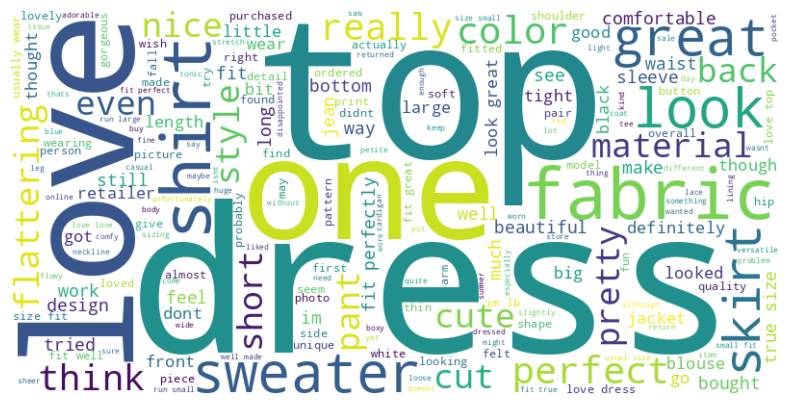

In [5]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
#nltk.download('all')

df = pd.read_csv('/content/drive/MyDrive/Womens Clothing E-Commerce Reviews.csv')
df.dropna(inplace=True)

# Preprocessing function
def preprocess(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    text = text.lower()
    text = text.strip()
    tokens = text.split()
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

df['processed_review'] = df['Review Text'].apply(preprocess)
all_text = ' '.join(df['processed_review'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
